In [1]:
#import libraries
import pandas as pd
import warnings as w    
w.filterwarnings('ignore')
import matplotlib.pyplot as plt
import mplcyberpunk
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pmdarima as pm
from neuralprophet import NeuralProphet
from prophet import Prophet
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
#read the original csv
df=pd.read_csv("owid-covid-data.csv")

In [3]:
#date column to date time
df['date'] =  pd.to_datetime(df['date'])

In [4]:
#getting cases sum by day
df_by_day = df.groupby(['date','location'])['new_cases'].sum()
df_by_day=pd.DataFrame(df_by_day)
df_by_day.reset_index(inplace=True)

In [5]:
#filter worldwide
df_by_day_world = df_by_day.loc[df_by_day['location'] == 'World']

In [62]:
#filter cases date
plot_cases=df_by_day.filter(['new_cases','date'])

In [63]:
plot_cases.set_index('date',inplace=True)

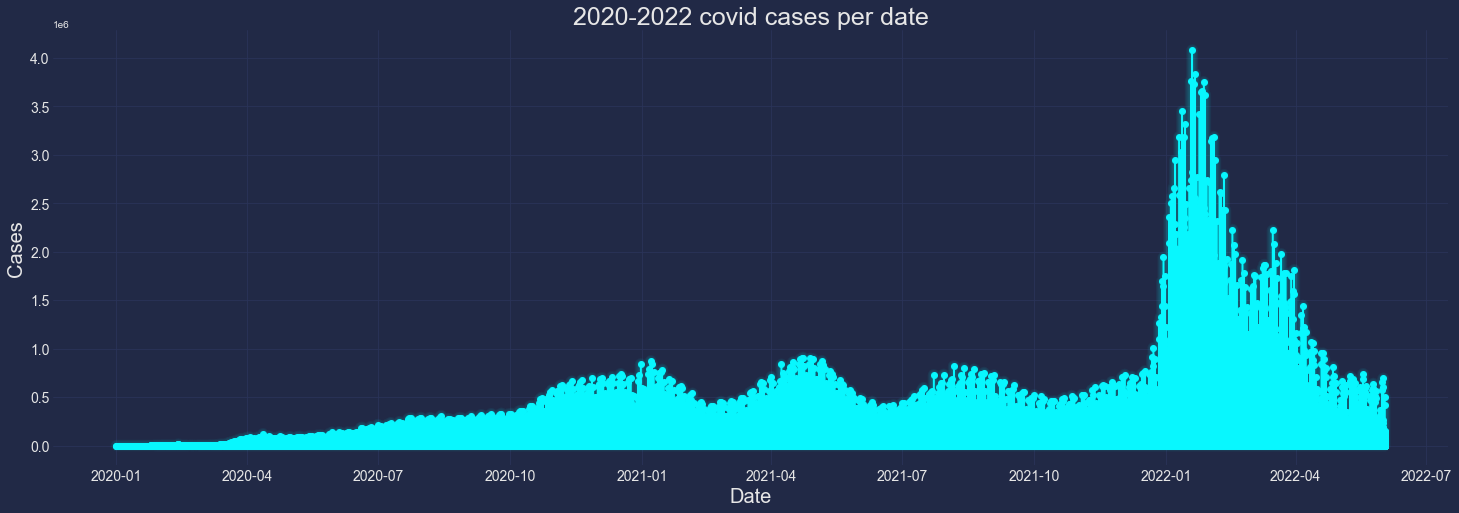

In [66]:
#plot the total cases per day
plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(plot_cases,marker='o')
plt.title('2020-2022 covid cases per date',fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()

# First attempt using Prophet and original worldwide data 

In [10]:
prophetdf=df_by_day_world.filter(['new_cases','date'])
prophetdf.columns=['y','ds']

In [11]:
prophetdf

,y,ds
86,0.0,2020-01-22
107,100.0,2020-01-23
130,287.0,2020-01-24
155,493.0,2020-01-25
181,683.0,2020-01-26
...,...,...
190212,272829.0,2022-05-29
190442,371486.0,2022-05-30
190672,655340.0,2022-05-31
190902,692180.0,2022-06-01


In [12]:
model=Prophet(daily_seasonality=True)
model2=model.fit(prophetdf)
future=model.make_future_dataframe(periods=365,freq="D")
forecast=model.predict(future)

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-179289.4,57111.0,786034.4,-179289.4,-179289.4,607641.7,607641.7,607641.7,-724750.0,...,78294.8,78294.8,78294.8,1254096.9,1254096.9,1254096.9,0.0,0.0,0.0,428352.2
1,2020-01-23,-171686.0,60569.2,809441.5,-171686.0,-171686.0,602359.8,602359.8,602359.8,-724750.0,...,79066.4,79066.4,79066.4,1248043.4,1248043.4,1248043.4,0.0,0.0,0.0,430673.7
2,2020-01-24,-164082.6,66205.5,783941.1,-164082.6,-164082.6,580527.5,580527.5,580527.5,-724750.0,...,67350.4,67350.4,67350.4,1237927.1,1237927.1,1237927.1,0.0,0.0,0.0,416444.8
3,2020-01-25,-156479.2,-74357.0,654069.4,-156479.2,-156479.2,438627.2,438627.2,438627.2,-724750.0,...,-60697.7,-60697.7,-60697.7,1224074.9,1224074.9,1224074.9,0.0,0.0,0.0,282148.0
4,2020-01-26,-148875.8,-174653.9,531327.9,-148875.8,-148875.8,331044.7,331044.7,331044.7,-724750.0,...,-151043.3,-151043.3,-151043.3,1206838.1,1206838.1,1206838.1,0.0,0.0,0.0,182168.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2023-05-29,-500897.3,-3626316.4,1060745.1,-2787278.8,1812967.1,-775695.1,-775695.1,-775695.1,-724750.0,...,-45850.2,-45850.2,-45850.2,-5094.9,-5094.9,-5094.9,0.0,0.0,0.0,-1276592.4
1224,2023-05-30,-505859.2,-3495338.6,1098806.5,-2811184.3,1813690.5,-702020.1,-702020.1,-702020.1,-724750.0,...,32879.7,32879.7,32879.7,-10149.8,-10149.8,-10149.8,0.0,0.0,0.0,-1207879.3
1225,2023-05-31,-510821.0,-3489910.2,1196890.3,-2824478.2,1814413.9,-661683.3,-661683.3,-661683.3,-724750.0,...,78294.8,78294.8,78294.8,-15228.1,-15228.1,-15228.1,0.0,0.0,0.0,-1172504.4
1226,2023-06-01,-515782.9,-3431607.5,1282259.9,-2843399.0,1815137.4,-666076.1,-666076.1,-666076.1,-724750.0,...,79066.4,79066.4,79066.4,-20392.4,-20392.4,-20392.4,0.0,0.0,0.0,-1181859.0


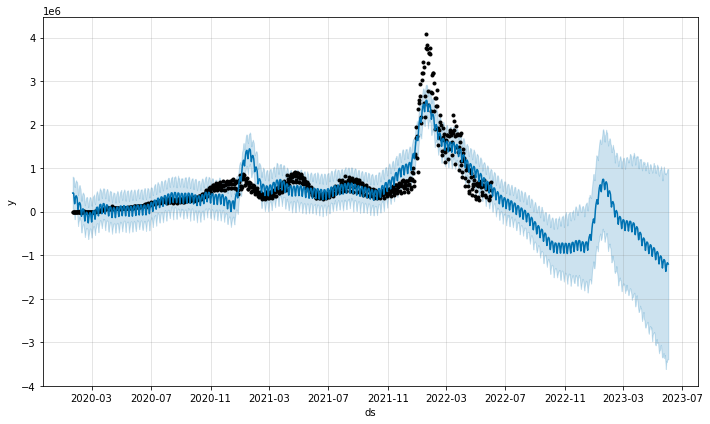

In [13]:
plot=model.plot(forecast)

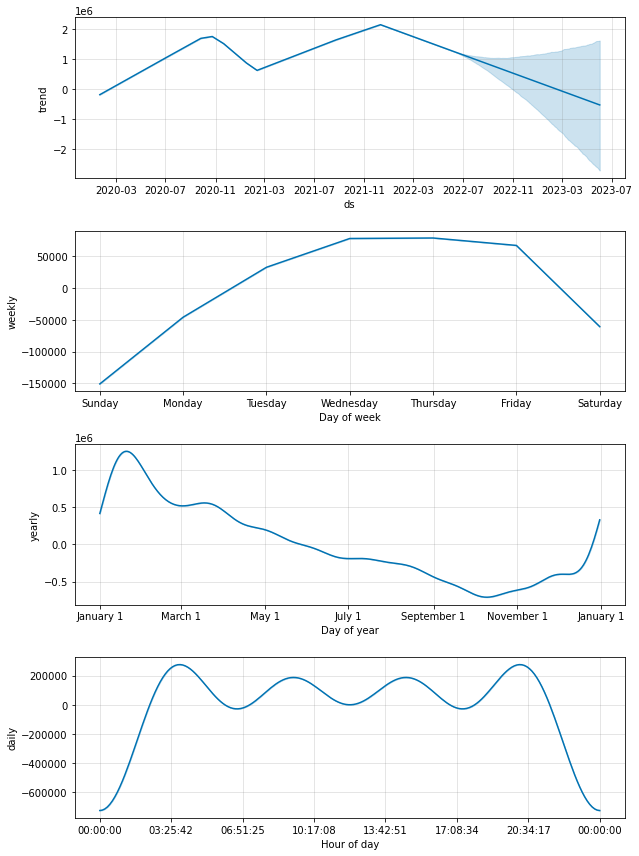

In [14]:
plot2=model.plot_components(forecast)

# Second attempt filtering specific dates (2021) using prophet / two years prediction

In [28]:
prophetdf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
prophetdf = prophetdf.loc[df_by_day_world['date'] <= "2021-12-01" ]
prophetdf=prophetdf.filter(['new_cases','date'])
plot=prophetdf.copy()
prophetdf.columns=['y','ds']

In [29]:
prophetdf

,y,ds
68356,588664.0,2021-01-01
68584,581373.0,2021-01-02
68812,520359.0,2021-01-03
69040,556398.0,2021-01-04
69268,741261.0,2021-01-05
...,...,...
146782,483925.0,2021-11-27
147022,432043.0,2021-11-28
147262,631973.0,2021-11-29
147502,600026.0,2021-11-30


In [30]:
plot.set_index('date',inplace=True)

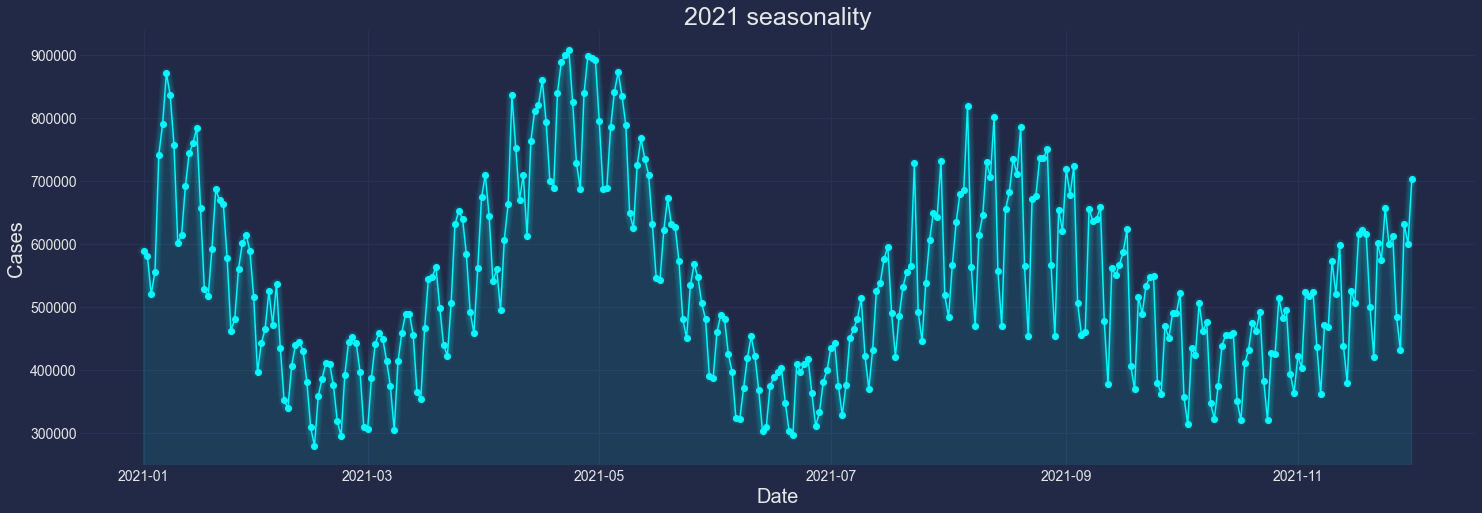

In [34]:
#plot seasonality
plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(plot,marker='o')
plt.title('2021 seasonality',fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Cases', fontsize=20)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()


In [19]:
model=Prophet(daily_seasonality=True,yearly_seasonality=True)
model2=model.fit(prophetdf)
future=model.make_future_dataframe(periods=730,freq="D")
forecast=model.predict(future)


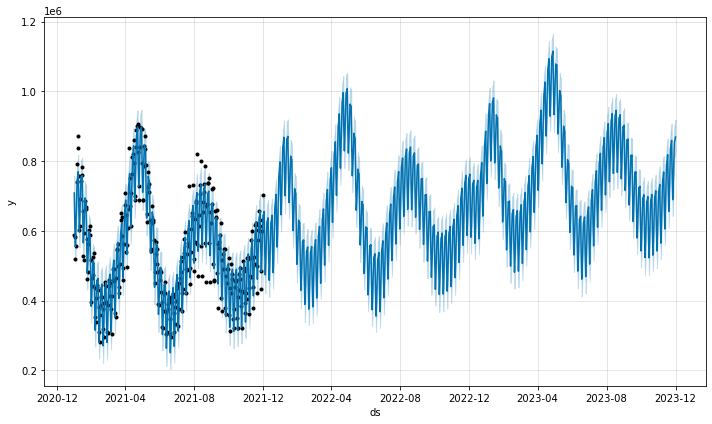

In [20]:
plot=model2.plot(forecast)

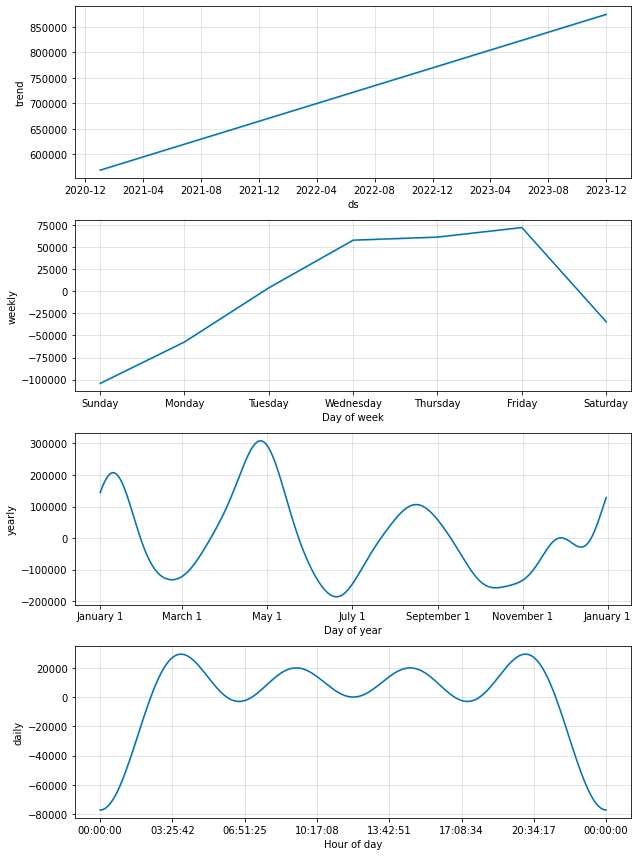

In [21]:
fig2 = model2.plot_components(forecast)

# Third attempt using arima (approx two past months prediction)

In [49]:
arimadf=df_by_day_world.copy()

In [50]:
arimadf.drop('location',inplace=True,axis=1)

In [51]:
arimadf=arimadf.set_index('date')

In [52]:
arimadf

,new_cases
date,
2020-01-22,0.0
2020-01-23,100.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,683.0
...,...
2022-05-29,272829.0
2022-05-30,371486.0
2022-05-31,655340.0


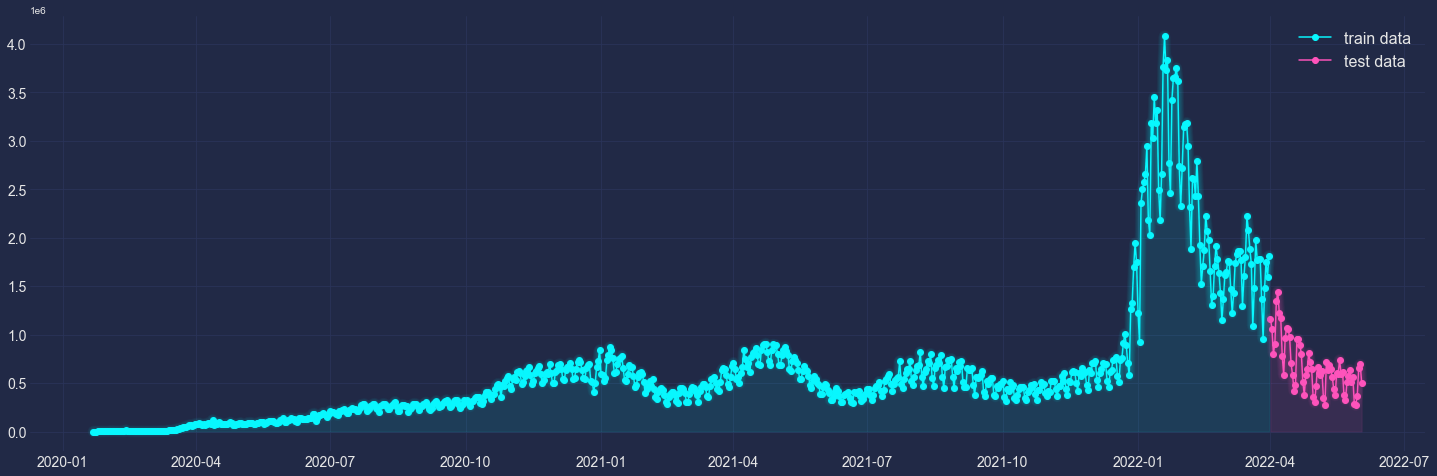

In [53]:
timeseries = arimadf['new_cases'].copy()
#splitting manually train and test size(90%-10%)
train_ts = timeseries[0:800]
test_ts = timeseries[800:]

#plot
plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(train_ts,label='train data',marker='o')
plt.plot(test_ts,label='test data',marker='o')
plt.legend(loc=1, prop={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()

In [54]:
#fit model
ar = pm.arima.ARIMA(order=(24,0,0))
ar.fit(train_ts)

WARNING - (py.warnings._showwarnmsg) - C:\Users\schek\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA(order=(24, 0, 0))

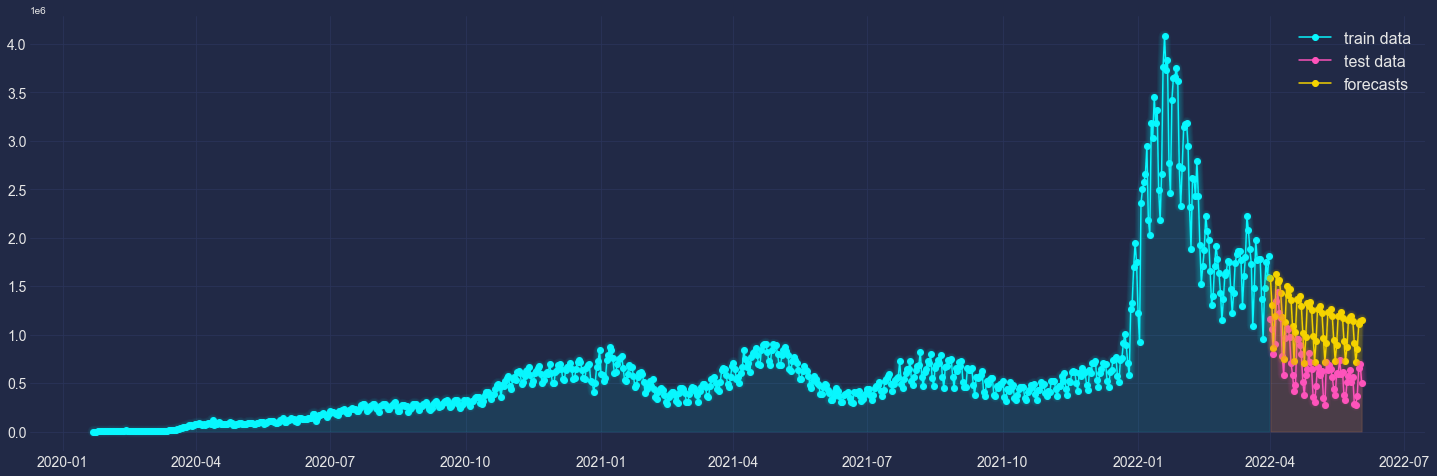

In [55]:
#plot forecasts
y_pred = pd.DataFrame(ar.predict(n_periods=63), index=test_ts.index, columns=['pred'])
plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(train_ts, label='train data',marker='o')
plt.plot(test_ts, label='test data',marker='o')
plt.plot(y_pred, label='forecasts',marker='o')
plt.legend(loc=1, prop={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()

In [56]:
#print mae,mse
print(f'mean absolute error: {round(mean_absolute_error(test_ts, y_pred), 2)} \n')
print(f'mean squared error: {round(mean_squared_error(test_ts, y_pred), 2)} \n')

mean absolute error: 465939.76 

mean squared error: 240342885221.59 



# Fourth attempt using arima (test on 2021 )

In [57]:
arimadf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
arimadf = arimadf.loc[arimadf['date'] <= "2021-12-01" ]
arimadf=arimadf.filter(['new_cases','date'])
arimadf.set_index('date',inplace=True)

In [58]:
arimadf.shape

(335, 1)

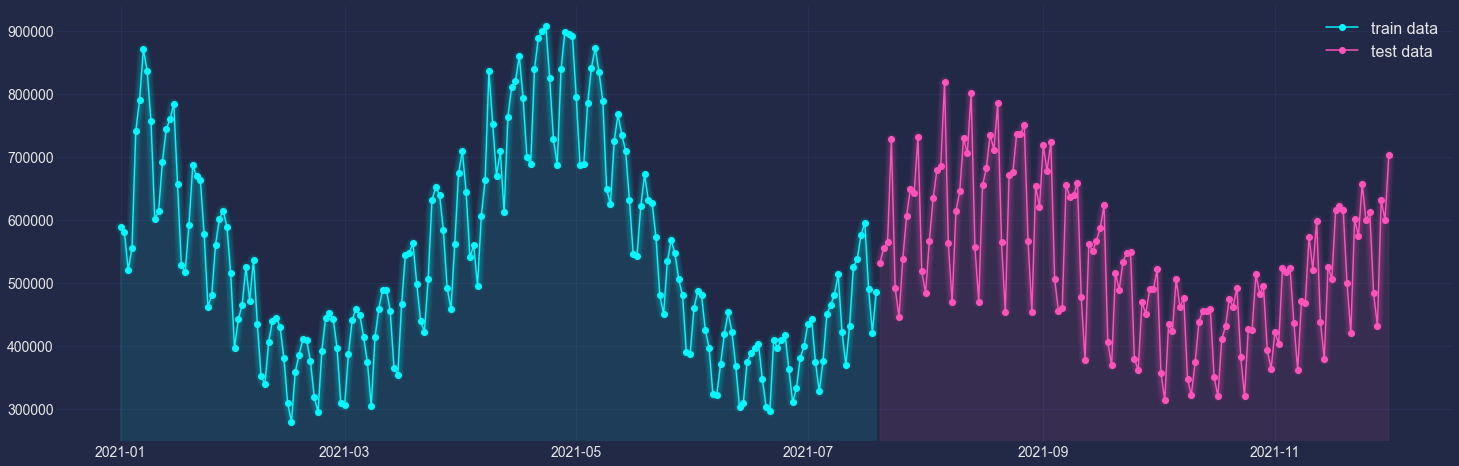

In [59]:
#split 40% test size
timeseries = arimadf['new_cases'].copy()
train_ts = timeseries[0:200]
test_ts = timeseries[200:]

plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(train_ts, label='train data',marker='o')
plt.plot(test_ts, label='test data',marker='o')
plt.legend(loc=1, prop={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()

In [60]:
ar = pm.arima.ARIMA(order=(24,0,0))
ar.fit(train_ts)

WARNING - (py.warnings._showwarnmsg) - C:\Users\schek\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA(order=(24, 0, 0))

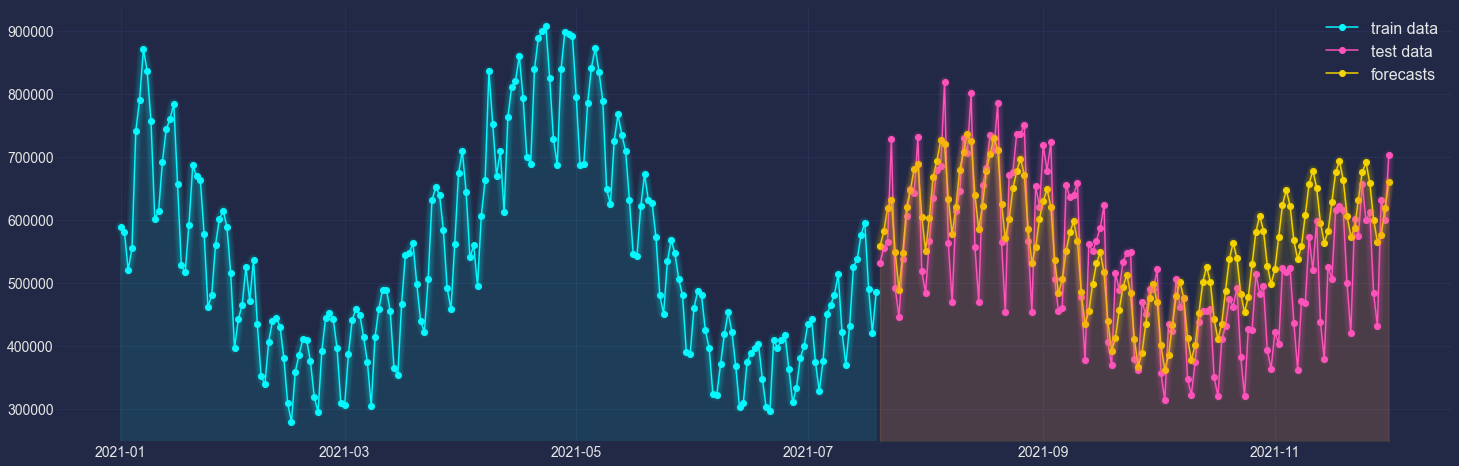

In [61]:
#forecasts
y_pred = pd.DataFrame(ar.predict(n_periods=135), index=test_ts.index, columns=['pred'])
plt.figure(figsize=(25,8))
plt.style.use("cyberpunk")
plt.plot(train_ts, label='train data',marker='o')
plt.plot(test_ts, label='test data',marker='o')
plt.plot(y_pred, label='forecasts',marker='o')
plt.legend(loc=1, prop={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.show()

In [35]:
#print mae,mse
print(f'mean absolute error: {round(mean_absolute_error(test_ts, y_pred), 2)} \n')
print(f'mean squared error: {round(mean_squared_error(test_ts, y_pred), 2)} \n')

mean absolute error: 64128.36 

mean squared error: 5851773852.43 



# Fifth Attempt using neuralprophet on 2021 dates

In [37]:
neuraldf = df_by_day_world.loc[df_by_day_world['date'] >= "2021-01-01" ]
neuraldf = neuraldf.loc[neuraldf['date'] <= "2021-12-01" ]
neuraldf=neuraldf.filter(['new_cases','date'])
neuraldf.columns=['y','ds']

In [38]:
neuraldf

,y,ds
68356,588664.0,2021-01-01
68584,581373.0,2021-01-02
68812,520359.0,2021-01-03
69040,556398.0,2021-01-04
69268,741261.0,2021-01-05
...,...,...
146782,483925.0,2021-11-27
147022,432043.0,2021-11-28
147262,631973.0,2021-11-29
147502,600026.0,2021-11-30


In [44]:
m=NeuralProphet(epochs=1000,daily_seasonality=True,yearly_seasonality=True)

In [45]:
m.fit(neuraldf,freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.701% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.701% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.86E-01, min: 3.57E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.86E-01, min: 3.57E-01


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.03E-02, min: 1.00E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.03E-02, min: 1.00E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.53E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.53E-01
Epoch[1000/1000]: 100%|█| 1000/1000 [00:21<00:00, 45.62it/s, SmoothL1Loss=0.00253, MAE=2.97e+4, RMSE=3.78e+4, RegLoss=0


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.7,566828.8,713447.5,0.0
1,0.6,519921.9,646534.4,0.0
2,0.5,484780.7,601905.4,0.0
3,0.5,458328.3,561703.8,0.0
4,0.4,434130.2,533731.2,0.0
...,...,...,...,...
995,0.0,29662.4,37732.3,0.0
996,0.0,29660.0,37685.3,0.0
997,0.0,29656.4,37965.4,0.0
998,0.0,29655.2,37871.1,0.0


In [46]:
future=m.make_future_dataframe(neuraldf,periods=550)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.701% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.701% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [47]:
forecast=m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.818% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.818% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.818% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.818% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


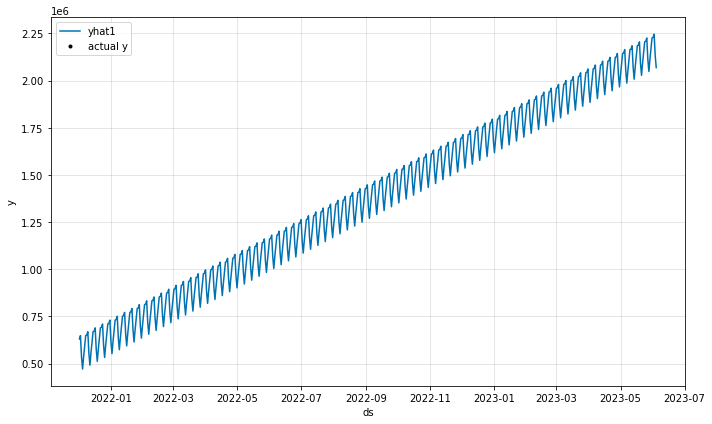

In [43]:
plot=m.plot(forecast)